In [ ]:
#Step 1: data imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

#Step 2: generating synthetic data
np.random.seed(42)
n=1000

d=pd.DataFrame({
    'area_sqft' : np.random.normal(1200,300,n).clip(400,3000),
    'num_bedrooms': np.random.choice([1,2,3,4,5],size=n,p=[0.1,0.4,0.3,0.15,0.05]),
    'num_bathrooms': np.random.choice([1,2,3],size=n,p=[0.5,0.4,0.1]),
    'floor': np.random.randint(1,21,size=n),
    'age_of_property': np.random.randint(0, 50, size=n),
    'location_type': np.random.choice(['Urban', 'Suburban', 'Rural'], size=n, p=[0.5, 0.3, 0.2]),
    'proximity_to_city_km': np.random.normal(10, 5, n).clip(0.5, 40),
    'has_parking': np.random.choice([0, 1], size=n, p=[0.3, 0.7]),
    'has_gym': np.random.choice([0, 1], size=n, p=[0.6, 0.4]),
    'has_swimming_pool': np.random.choice([0, 1], size=n, p=[0.85, 0.15]),
    'monthly_maintenance': np.random.normal(2000, 800, n).clip(500, 10000),
    'built_quality_score': np.random.normal(7, 1.5, n).clip(1, 10)
})

# Step 3: Introduce Controlled Noise
d['area_sqft'] += np.random.normal(0,80,n)
d['monthly_maintenance'] += np.random.normal(0,400,n)

# Step 4: Add Multicollinearity
# Create a new feature highly correlated with area
d['area_in_sq_meters']=d['area_sqft'] * 0.092903 + np.random.normal(0,2,n)

# Step 5: Add Duplicates and Missing Values
# Add some duplicates
d=pd.concat([d,d.sample(10,random_state=1)],ignore_index=True)
# Add missing values
for i in ['area_sqft', 'built_quality_score', 'monthly_maintenance']:
  d.loc[d.sample(frac=0.02,random_state=42).index,i]=np.nan


# Step 6: Insert Outliers
outliers=pd.DataFrame({
    'area_sqft': [5000, 6000],
    'num_bedrooms': [8, 10],
    'num_bathrooms': [6, 7],
    'floor': [50, 60],
    'age_of_property': [2, 1],
    'location_type': ['Urban', 'Urban'],
    'proximity_to_city_km': [0.1, 0.5],
    'has_parking': [1, 1],
    'has_gym': [1, 1],
    'has_swimming_pool': [1, 1],
    'monthly_maintenance': [20000, 25000],
    'built_quality_score': [10, 10],
})
outliers['area_in_sq_meters'] =outliers['area_sqft'] * 0.09903
d=pd.concat([d,outliers],ignore_index=False)

#creating target variables

#  Step 7: Create Target Variable (Price)---for regression
d['price'] = (
    d['area_sqft'] * 0.05 +
    d['num_bedrooms'] * 5 +
    d['num_bathrooms'] * 4 +
    d['floor'] * 0.2 +
    (10 - d['age_of_property']) * 0.5 +
    d['has_parking'] * 2 +
    d['has_gym'] * 1 +
    d['has_swimming_pool'] * 3 +
    d['built_quality_score'] * 2 -
    d['proximity_to_city_km'] * 0.5 +
    np.random.normal(0, 5, len(d))
).round(2)

# Step 8: Price Category (For classification)
d['price_category']=pd.cut(
    d['price'],
    bins=[-np.inf, 40, 80, np.inf],
    labels=['Low', 'Medium', 'High']
)

# 💾 Step 9: Save Dataset
d.to_csv('house_prices_with_issues.csv', index=False)
print("✅ Dataset saved as 'house_prices_with_issues.csv' with noise, outliers, missing values, and multicollinearity.")


✅ Dataset saved as 'house_prices_with_issues.csv' with noise, outliers, missing values, and multicollinearity.


Regression

     area_sqft  num_bedrooms  num_bathrooms  floor  age_of_property  \
0  1197.284562             2              1     17                3   
1  1258.477278             2              1     13               20   
2  1371.018825             3              1     18               39   
3  1580.875535             3              1      2               13   
4  1321.785850             1              2     13               38   

  location_type  proximity_to_city_km  has_parking  has_gym  \
0      Suburban              9.162213            1        1   
1         Urban             10.947030            1        1   
2         Urban             10.494090            0        1   
3         Urban              7.183052            1        1   
4         Urban              9.235579            1        0   

   has_swimming_pool  monthly_maintenance  built_quality_score  \
0                  0          1845.342004             7.949642   
1                  0          3654.972319             8.213511

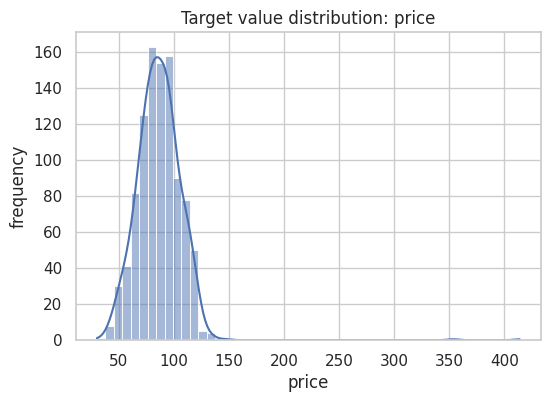

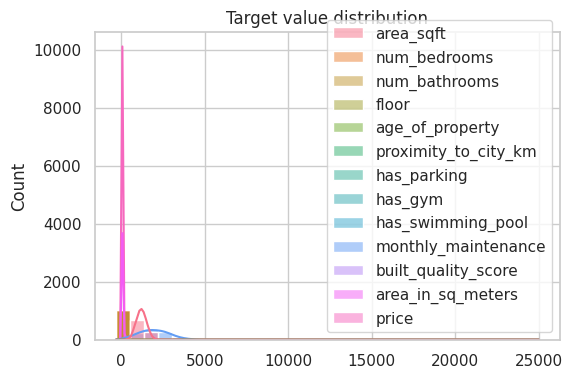

skewness of num features: monthly_maintenance     8.823179
price                   4.733094
area_in_sq_meters       4.259514
area_sqft               3.691037
has_swimming_pool       2.098134
num_bathrooms           1.255272
num_bedrooms            0.801407
floor                   0.724316
has_gym                 0.370349
proximity_to_city_km    0.049168
age_of_property        -0.000458
built_quality_score    -0.199603
has_parking            -0.940154
dtype: float64


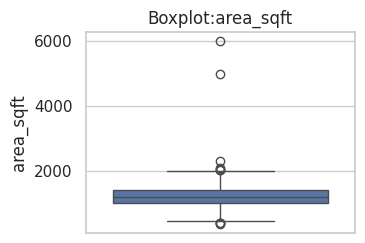

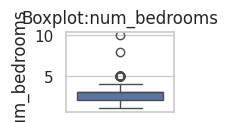

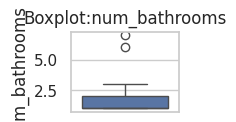

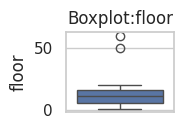

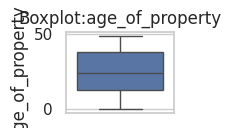

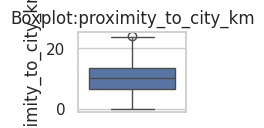

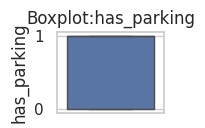

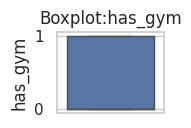

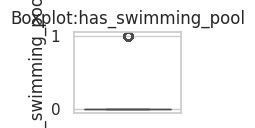

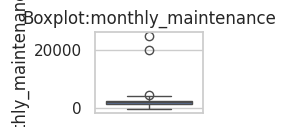

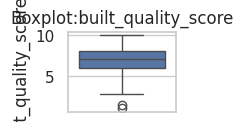

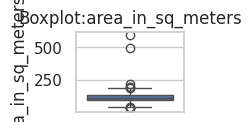

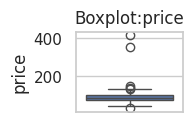

the missing values are area_sqft               20
num_bedrooms             0
num_bathrooms            0
floor                    0
age_of_property          0
location_type            0
proximity_to_city_km     0
has_parking              0
has_gym                  0
has_swimming_pool        0
monthly_maintenance     20
built_quality_score     20
area_in_sq_meters        0
price                   20
price_category          20
dtype: int64
duplicates are 0
                       count unique    top freq         mean          std  \
area_sqft              992.0    NaN    NaN  NaN  1212.031536   355.741844   
num_bedrooms          1012.0    NaN    NaN  NaN      2.68083     1.063702   
num_bathrooms         1012.0    NaN    NaN  NaN     1.600791     0.695271   
floor                 1012.0    NaN    NaN  NaN    10.956522     5.963297   
age_of_property       1012.0    NaN    NaN  NaN    24.775692    14.349188   
location_type           1012      3  Urban  522          NaN          NaN   
pro

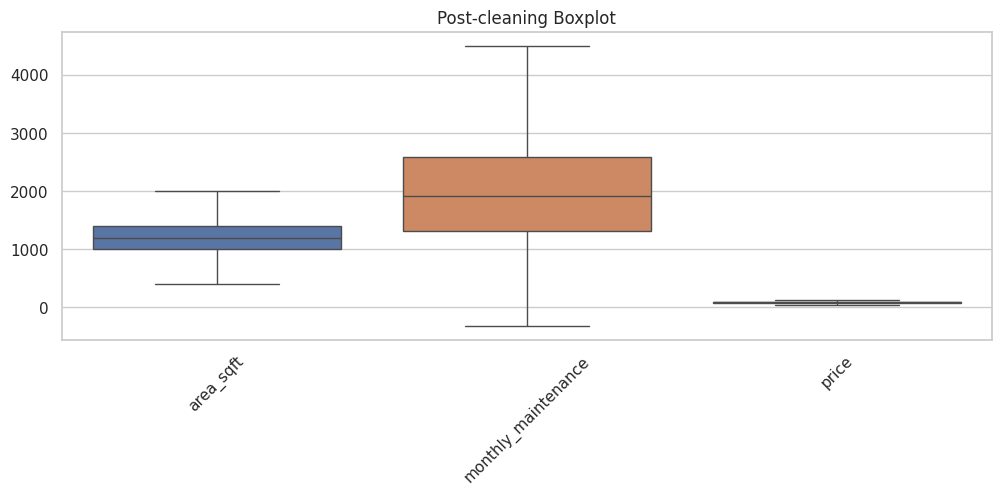

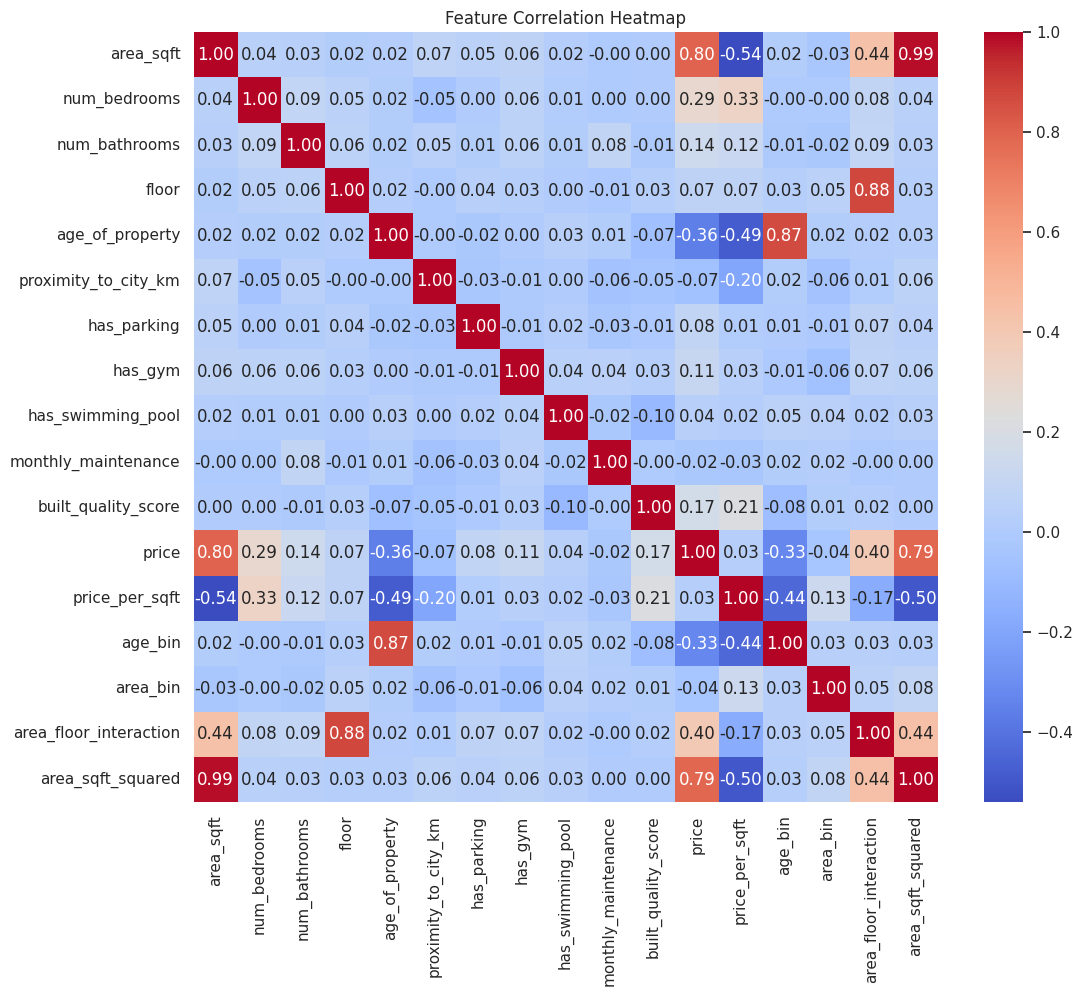

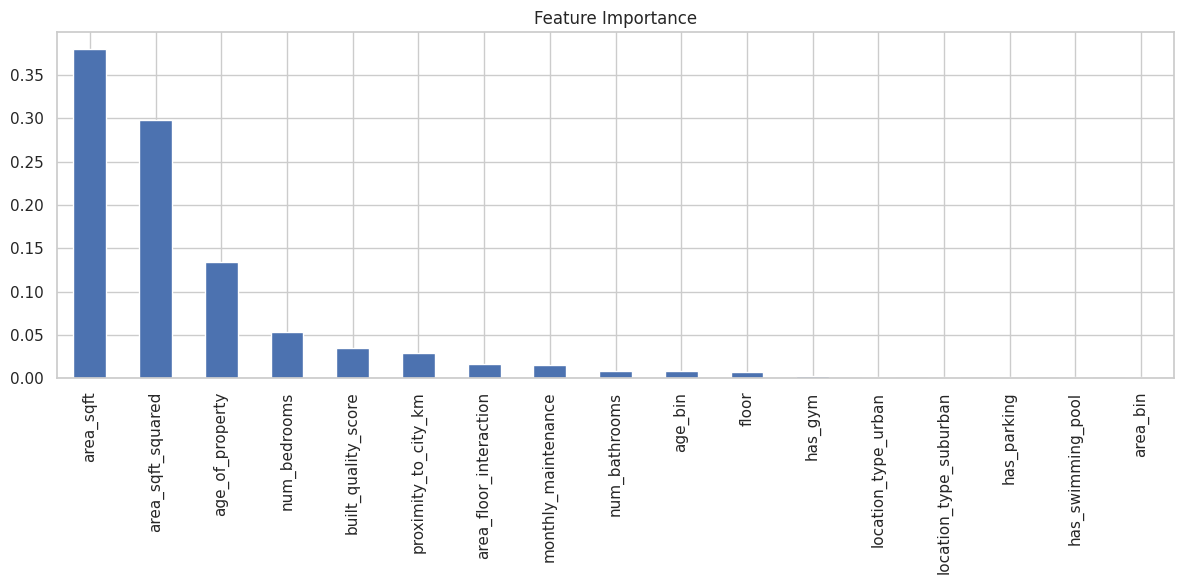

Selected Features:
 ['area_sqft', 'num_bedrooms', 'num_bathrooms', 'floor', 'age_of_property', 'proximity_to_city_km', 'has_swimming_pool', 'built_quality_score', 'area_floor_interaction', 'area_sqft_squared']
                Feature       VIF
7   built_quality_score  1.016687
1          num_bedrooms  1.014584
2         num_bathrooms  1.014516
5  proximity_to_city_km  1.012046
6     has_swimming_pool  1.010343
0             area_sqft  1.008175
3                 floor  1.007518
4       age_of_property  1.006761
R2 Score: 0.9155438112549759
RMSE: 5.590720980178737
🔹 MAE: 4.541035179129491


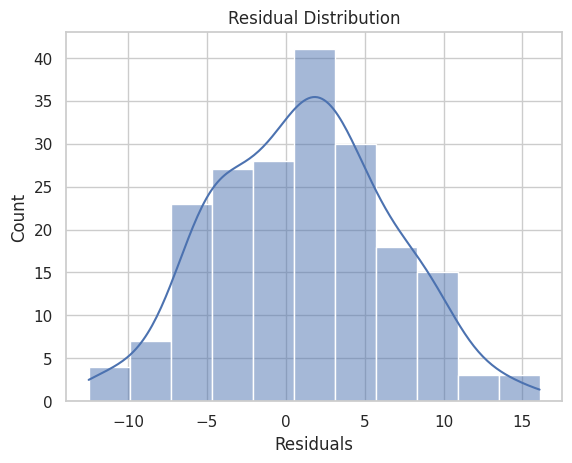

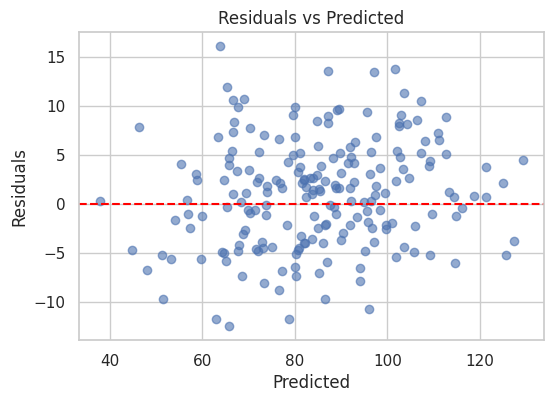

In [ ]:
#Linear regression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

#step-1 data loading

dl=pd.read_csv('house_prices_with_issues.csv')
print(dl.head())
print(dl.shape)
print(dl.info())
print(dl.dtypes)
print(dl.describe(include='all').T)
#chech for nulls,duplicates and unique values per column
print(dl.isnull().sum())
print(dl.duplicated().sum())
print(dl.nunique)
#target value distribution
plt.figure(figsize=(6,4))
sns.histplot(dl['price'],bins=50,kde=True)
plt.title('Target value distribution: price')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

##observations
#Any feature that is highly skewed or with strong outliers?
num_c=dl.select_dtypes(include='number').columns
plt.figure(figsize=(6,4))
sns.histplot(dl[num_c],bins=30,kde=True)
plt.title('Target value distribution')
plt.tight_layout
plt.show()
#skewness
skewed=dl[num_c].skew().sort_values(ascending=False)
print('skewness of num features:',skewed)
#outliers using boxplot
plt.figure(figsize=(16,12))
for i,col in enumerate(num_c):
  plt.subplot(4,4,i+1)
  sns.boxplot(data=dl,y=col)
  plt.title(f'Boxplot:{col}')
  plt.show()

#Any missing or duplicate rows?
print('the missing values are',dl.isnull().sum())
print('duplicates are',dl.duplicated().sum())
#Value ranges for target and key features?
print((dl.describe(include='all')).T)



#step-2 data cleaning

# 2.1 Remove Duplicates
print('Before removing duplicates',dl.shape)
dl=dl.drop_duplicates()
print('After removing duplicates',dl.shape)

# 2.2.1 Handle Missing Values
for i in ['area_sqft','monthly_maintenance','built_quality_score']:
  median_val=d[i].median()
  dl[i].fillna(median_val,inplace=True)
print('missing values handled')

# 2.2.2 Drop rows with missing target
dl = dl.dropna(subset=['price'])
print('✅ Dropped rows with missing target variable (price).')

dl[dl['monthly_maintenance'] < 0]  # Find the bad rows


#2.3 Handle Outliers
def cap_outliers(dl,col):
  q1=dl[col].quantile(0.25)
  q3=dl[col].quantile(0.75)
  IQR=q3-q1
  lower= q1 - 1.5 * IQR
  upper= q3 + 1.5 * IQR
  dl[col] = np.where(dl[col] <lower,lower,dl[col])
  dl[col]= np.where(dl[col]>upper,upper,dl[col])
for col in ['area_sqft', 'monthly_maintenance', 'floor', 'price']:
    cap_outliers(dl, col)
print("Outliers capped using IQR method.")

#2.4 Drop Multicollinear Features
if 'area_in_sq_meters' in dl.columns:
    dl.drop(columns=['area_in_sq_meters'], inplace=True)
    print("Dropped highly correlated column: area_in_sq_meters")

#2.5 Encode Categorical Variables
dl['location_type']=dl['location_type'].str.lower().str.strip()
dl=pd.get_dummies(dl,columns=['location_type'],drop_first=True)
print("✅ Encoded categorical variable: location_type")

#after cleaning
print("Cleaned dataset shape:", dl.shape)
print("Missing values:\n", dl.isnull().sum())

plt.figure(figsize=(12, 4))
sns.boxplot(data=dl[['area_sqft', 'monthly_maintenance', 'price']])
plt.title("Post-cleaning Boxplot")
plt.xticks(rotation=45)
plt.show()


#step-3 feature engineering
#1. Create New Feature:
dl['price_per_sqft'] = dl['price'] / dl['area_sqft']
#Bin Features: Age & Area
dl['age_bin'] = pd.cut(dl['age_of_property'],
                       bins=[-1, 5, 15, 30, 100],
                       labels=['New', 'Moderate', 'Old', 'Very Old'])


dl['area_bin'] = pd.cut(dl['area_sqft'],
                        bins=[0, 800, 1200, 1600, 2200, 3500],
                        labels=['Small', 'Medium', 'Large', 'XL', 'XXL'])
#3. Interaction Feature: area × floor
dl['area_floor_interaction'] = dl['area_sqft'] * dl['floor']
#4. Polynomial Feature: area_sqft² (for Linear/Polynomial Regression)
dl['area_sqft_squared'] = dl['area_sqft'] ** 2



#step-4 Feature scaling and splitting
# Label encode ordinal bins
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
dl[['age_bin', 'area_bin']] = ord_encoder.fit_transform(dl[['age_bin', 'area_bin']])

#scaling
from sklearn.preprocessing import StandardScaler
num_cols = ['area_sqft', 'num_bedrooms', 'num_bathrooms', 'floor', 'age_of_property',
            'proximity_to_city_km', 'monthly_maintenance', 'built_quality_score',
            'area_floor_interaction', 'area_sqft_squared']

scaler = StandardScaler()
dl[num_cols] = scaler.fit_transform(dl[num_cols])

#splitting
x = dl.drop(['price', 'price_per_sqft', 'price_category'], axis=1, errors='ignore')
y = dl['price']

#step-6 feature selection
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Use only numeric columns
numeric_dl = dl.select_dtypes(include=[np.number])

# Now compute correlation matrix
corr_matrix = numeric_dl.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#2. Feature Importance from Tree-Based Models
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Feature Importance')
plt.tight_layout()
plt.show()

#3. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)
selected_features = x.columns[fit.support_]
print("Selected Features:\n", selected_features.tolist())
x= x[selected_features]

#Low Variance Removal
from sklearn.feature_selection import VarianceThreshold
# Remove features with variance less than threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
x_var = selector.fit_transform(x)
# Keep only the selected columns
x= x[x.columns[selector.get_support()]]

#2. High Correlation Removal
# Create correlation matrix
corr_matrix = x.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
# Drop them
x = x.drop(columns=to_drop)

#variance influence factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Create a DataFrame of only numeric features
numeric_x = x.select_dtypes(include=[np.number])
# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_x.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_x.values, i) for i in range(numeric_x.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))



#model building
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)
print("🔹 MAE:", mean_absolute_error(y_test, y_pred))

#2. Residual Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

residuals = y_test - y_pred

# Plot Residual Distribution
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

#Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


#Install and Import:
pip install shap
import shap
import pandas as pd
import numpy as np
#Train Tree-Based Model (e.g., Random Forest):
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#SHAP Values:
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

#SHAP Summary Plot:
shap.summary_plot(shap_values, X_test, plot_type="bar")

#SHAP Beeswarm Plot:
shap.summary_plot(shap_values, X_test)

# SHAP Force Plot (Individual Prediction):
shap.plots.force(shap_values[0])  # explanation for 1st prediction



Number of duplicate rows: 0
